In [350]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error

In [353]:
df = pd.read_csv("bitcoin.csv")
df= df.dropna()
df['predict'] = None

df


,date,price,total_volume,market_cap,coin_name,predict
0,2015-01-01 00:00:00.000,313.992000,4.699936e+07,4.293958e+09,bitcoin,None
1,2015-01-02 00:00:00.000,314.446000,3.885591e+07,4.301448e+09,bitcoin,None
2,2015-01-03 00:00:00.000,286.572000,1.187789e+08,3.921358e+09,bitcoin,None
3,2015-01-04 00:00:00.000,260.936000,2.055001e+08,3.571640e+09,bitcoin,None
4,2015-01-05 00:00:00.000,273.220000,1.550381e+08,3.740880e+09,bitcoin,None
...,...,...,...,...,...,...
2933,2023-01-13 00:00:00.000,18866.810331,4.802511e+10,3.633811e+11,bitcoin,None
2934,2023-01-14 00:00:00.000,19941.780543,3.951442e+10,3.826753e+11,bitcoin,None
2935,2023-01-15 00:00:00.000,21019.206614,4.949871e+10,4.052099e+11,bitcoin,None
2936,2023-01-16 00:00:00.000,20853.230569,2.307213e+10,4.016974e+11,bitcoin,None


In [354]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2937 entries, 0 to 2937
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          2937 non-null   object 
 1   price         2937 non-null   float64
 2   total_volume  2937 non-null   float64
 3   market_cap    2937 non-null   float64
 4   coin_name     2937 non-null   object 
 5   predict       0 non-null      object 
dtypes: float64(3), object(3)
memory usage: 160.6+ KB


,price,total_volume,market_cap
count,2937.000000,2.937000e+03,2.937000e+03
mean,13356.822757,1.698602e+10,2.472976e+11
std,16278.386801,2.313215e+10,3.079666e+11
min,172.147900,1.823845e+07,2.362640e+09
25%,896.890000,1.039913e+09,1.445143e+10
50%,7395.866405,6.246603e+09,1.307076e+11
75%,17718.972833,2.739666e+10,3.295449e+11
max,67617.015545,4.293082e+11,1.278798e+12


In [355]:
df

,date,price,total_volume,market_cap,coin_name,predict
0,2015-01-01 00:00:00.000,313.992000,4.699936e+07,4.293958e+09,bitcoin,None
1,2015-01-02 00:00:00.000,314.446000,3.885591e+07,4.301448e+09,bitcoin,None
2,2015-01-03 00:00:00.000,286.572000,1.187789e+08,3.921358e+09,bitcoin,None
3,2015-01-04 00:00:00.000,260.936000,2.055001e+08,3.571640e+09,bitcoin,None
4,2015-01-05 00:00:00.000,273.220000,1.550381e+08,3.740880e+09,bitcoin,None
...,...,...,...,...,...,...
2933,2023-01-13 00:00:00.000,18866.810331,4.802511e+10,3.633811e+11,bitcoin,None
2934,2023-01-14 00:00:00.000,19941.780543,3.951442e+10,3.826753e+11,bitcoin,None
2935,2023-01-15 00:00:00.000,21019.206614,4.949871e+10,4.052099e+11,bitcoin,None
2936,2023-01-16 00:00:00.000,20853.230569,2.307213e+10,4.016974e+11,bitcoin,None


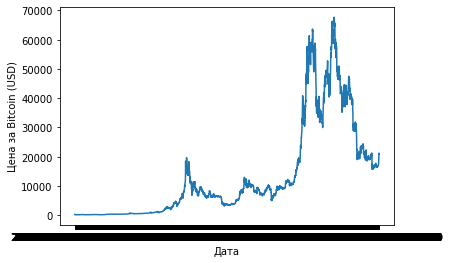

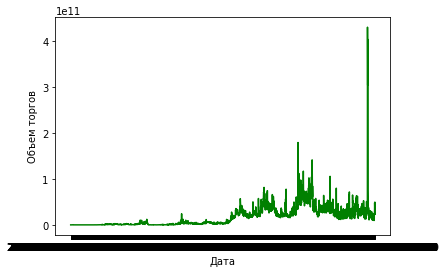

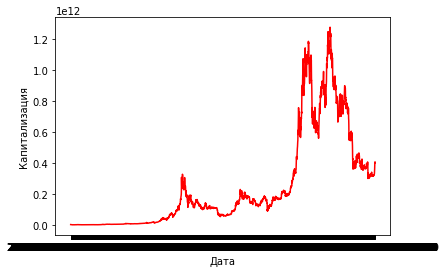

In [254]:
plt.plot(df.date, df.price)
plt.xlabel('Дата')
plt.ylabel('Цена за Bitcoin (USD)')
plt.show()
plt.plot(df.date, df.total_volume, c='g')
plt.xlabel('Дата')
plt.ylabel('Объем торгов')
plt.show()
plt.plot(df.date, df.market_cap, c='r')
plt.xlabel('Дата')
plt.ylabel('Капитализация')
plt.show()

In [356]:
x = df[['total_volume','market_cap']]
y = df['price']
print(x.head())
print(y.head())
x.shape

   total_volume    market_cap
0  4.699936e+07  4.293958e+09
1  3.885591e+07  4.301448e+09
2  1.187789e+08  3.921358e+09
3  2.055001e+08  3.571640e+09
4  1.550381e+08  3.740880e+09
0    313.992
1    314.446
2    286.572
3    260.936
4    273.220
Name: price, dtype: float64


(2937, 2)

In [357]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [358]:
modelLR = LinearRegression() # линейная 
modelDT = DecisionTreeRegressor() # Регрессия дерева решений
modelSVR = SVR() # Регрессия опорных векторов
modelGB = GradientBoostingRegressor() # градиентная регрессия 
modelRF = RandomForestRegressor() # случайного дерева

In [359]:
modelLR.fit(x_train, y_train)
modelDT.fit(x_train, y_train)
modelSVR.fit(x_train, y_train)
modelGB.fit(x_train, y_train)
modelRF.fit(x_train, y_train)

RandomForestRegressor()

In [369]:
print(modelLR.score(x_test, y_test))
print(modelDT.score(x_test, y_test))
print(modelSVR.score(x_test, y_test))
print(modelGB.score(x_test, y_test))
print(modelRF.score(x_test, y_test))

0.9993857640987515
0.9997311066380168
-0.0702344288405563
0.9998366195408582
0.9998604854422284


In [361]:
model1 = modelLR.predict(df[['total_volume','market_cap']])
model2 = modelGB.predict(df[['total_volume','market_cap']])
model3 = modelSVR.predict(df[['total_volume','market_cap']])
model4 = modelDT.predict(df[['total_volume','market_cap']])
model5 = modelRF.predict(df[['total_volume','market_cap']])

In [363]:
models = [model1, model2, model3, model4, model5]
min_diff_index = np.argmin([np.abs(model - df['price']) for model in models], axis=0)
min_diff_model = [models[i] for i in min_diff_index]

In [364]:
for i in range(df.shape[0]):
    df.loc[i,'predict'] = models[min_diff_index[i]][i]

In [365]:
df= df.dropna()
df


,date,price,total_volume,market_cap,coin_name,predict
0,2015-01-01 00:00:00.000,313.992000,4.699936e+07,4.293958e+09,bitcoin,313.992
1,2015-01-02 00:00:00.000,314.446000,3.885591e+07,4.301448e+09,bitcoin,314.446
2,2015-01-03 00:00:00.000,286.572000,1.187789e+08,3.921358e+09,bitcoin,286.572
3,2015-01-04 00:00:00.000,260.936000,2.055001e+08,3.571640e+09,bitcoin,260.936
4,2015-01-05 00:00:00.000,273.220000,1.550381e+08,3.740880e+09,bitcoin,273.22
...,...,...,...,...,...,...
2932,2023-01-12 00:00:00.000,17996.832554,2.543928e+10,3.456890e+11,bitcoin,18866.810331
2933,2023-01-13 00:00:00.000,18866.810331,4.802511e+10,3.633811e+11,bitcoin,20003.348216
2934,2023-01-14 00:00:00.000,19941.780543,3.951442e+10,3.826753e+11,bitcoin,21019.206614
2935,2023-01-15 00:00:00.000,21019.206614,4.949871e+10,4.052099e+11,bitcoin,20853.230569
